# Baseline Classifiers

It is important to establish baseline performance on a predictive modeling problem. A baseline provides a point of 
comparison for the more advanced methods that you evaluate later.

We are going to see how to implement two baseline classifiers:

- Random Prediction Algorithm

- ZeroR Algorithm

# Random Prediction Algorithm

Random Prediction Algorithm is going to predict the outcome randomly. It requires that you store all of the distinct outcome values in the training data.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
# Writing a function in Python

def Square(a):
    return a*a

In [5]:
result = Square(5)
print(result)

25


In [14]:
#Generate Random Predictions

def Random_Prediction(train, test):
    # Here train is the dataframe of the train set and test is the data frame of the test set
    columns_train = train.columns.tolist() # columns_train now contains the names of the columns in the train set
    print(columns_train)
    #print(len(columns_train))
    #print(columns_train[4])
    target_column = columns_train[len(columns_train)-1] # We assume the last column as the target column
    #print(target_column)
    #print(train[target_column]) #prints all values of the target column
    unique_vals = train[target_column].unique() # find the unique values in the target column
    #print(unique_vals)
    
    actual_values_test = test[target_column]
    #print(actual_values_test)
    predicted = [] # Initially it is an empty list
    import random
    for x in actual_values_test:
        predicted.append(random.choice(unique_vals))
    actual_values = actual_values_test.tolist() # actual_values is a list
    print("Actual values in test set", actual_values)
    print("Predicted Output         ", predicted)
    
    score = 0 # score represents the number of correct predictions
    i = 0
    for x in actual_values:
        if(predicted[i]==x):
            score = score + 1
        i = i + 1
    
    print(score)
   
    print ('Accuracy in percentage: ', score*100/len(actual_values))
   
    

In [15]:
Random_Prediction(df, df)

['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']
Actual values in test set ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
Predicted Output          ['yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no']
8
Accuracy in percentage:  57.142857142857146


# ZeroR Classifier

In [8]:
def ZeroR(train, test):
    columns_train = train.columns.tolist()
    target_column = columns_train[len(columns_train)-1]
    #print(target_column)
    train_set = train[target_column]
    
    output = train[target_column].mode()[0]
    print(output)
    predicted = []
    actual_values_test = test[target_column].tolist()
    for x in actual_values_test:
        predicted.append(output)
    print("Actual Values: ", actual_values_test)
    print("Predicted Values: ", predicted)
    
    score = 0
    i = 0
    for x in actual_values_test:
        if(predicted[i]==x):
            score = score + 1
        i = i + 1
    
    print(score)
   
    print ('Accuracy in percentage: ', score*100/len(actual_values_test))
    
    

In [9]:
ZeroR(df, df)

yes
Actual Values:  ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
Predicted Values:  ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
9
Accuracy in percentage:  64.28571428571429


# Analyzing the Distribution of the Random Prediction Classifier

In [10]:
def Random_Prediction_Version2(train, test):
    # Here train is the dataframe of the train set and test is the data frame of the test set
    columns_train = train.columns.tolist() # columns_train now contains the names of the columns in the train set
    #print(columns_train)
    #print(len(columns_train))
    #print(columns_train[4])
    target_column = columns_train[len(columns_train)-1] # We assume the last column as the target column
    #print(target_column)
    #print(train[target_column]) #prints all values of the target column
    unique_vals = train[target_column].unique() # find the unique values in the target column
    #print(unique_vals)
    actual_values_test = test[target_column]
    predicted = []
    import random
    for x in actual_values_test:
        predicted.append(random.choice(unique_vals))
    actual_values = actual_values_test.tolist()
    #print("Actual values in test set", actual_values)
    #print("Predicted Output         ", predicted)
    
    score = 0
    i = 0
    for x in actual_values:
        if(predicted[i]==x):
            score = score + 1
        i = i + 1
    
    #print(score)
   
    accuracy =  "{:.2f}".format(score*100/len(actual_values))
    return accuracy

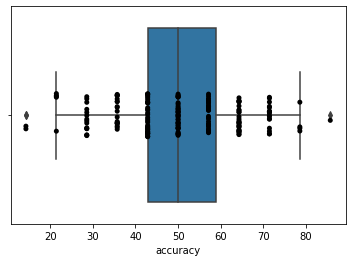

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

run = 200
i = 1
accuracy_list = []
while(i <= run):
    accuracy = Random_Prediction_Version2(df, df)
    i = i+1
    accuracy_list.append(accuracy)

accuracy_list = list(np.float_(accuracy_list))
#print(accuracy_list)
accuracy_df = pd.DataFrame(accuracy_list, columns = ['accuracy'])
#print(accuracy_df)

sns.boxplot(data = accuracy_df, x = 'accuracy')
sns.stripplot(data = accuracy_df, x = 'accuracy', color = 'black');




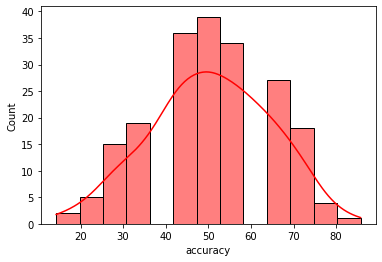

In [12]:
sns.histplot(data = accuracy_df, x = 'accuracy', kde = True, color = 'red');

In [13]:
print("Mean Accuracy: ", np.mean(accuracy_list))
print("Standard Deviation: ", np.std(accuracy_list))

print("Accuracy: ",  np.mean(accuracy_list), "+/-", np.std(accuracy_list))

Mean Accuracy:  50.50025000000001
Standard Deviation:  14.006928408380618
Accuracy:  50.50025000000001 +/- 14.006928408380618
